In [1]:
import pandas as pd
import numpy as np
import pandas_profiling.profile_report as ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/abutalha/Documents/Data Analyst/AI Quest/Data Science/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df1 = df.copy()
df2 = df.copy()

# Exploratory Data Analysis

In [5]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preparation

In [6]:
df.shape

(8555, 3)

In [7]:
df.count()

Gender    8555
Height    8555
Weight    8555
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [9]:
#check statistics 
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [10]:
#check null value
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

# Exploratory Data Analysis

In [11]:
#Check Correlation
df.corr()

,Height,Weight
Height,1.000000,0.922975
Weight,0.922975,1.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

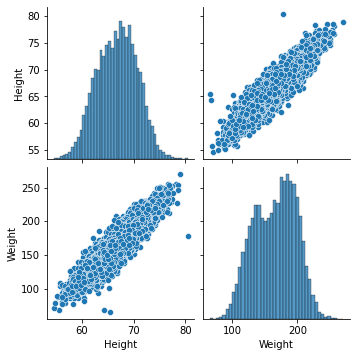

In [13]:
sns.pairplot(df)

Text(0, 0.5, 'Weight')

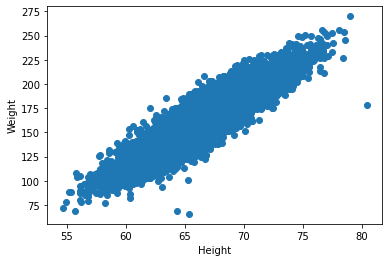

In [14]:
#Analyzing Correlation Features
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

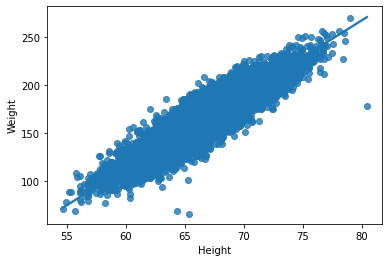

In [15]:
sns.regplot(x='Height', y='Weight', data=df)

# Categorical Feature Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
df.Gender = le.fit_transform(df['Gender'])

In [19]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


# Independent and Dependent Feature Selection

In [20]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
X.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [22]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# Split the Train and Test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=1)

In [25]:
X_train.shape

(5988, 2)

In [26]:
X_test.shape

(2567, 2)

# Model Training with Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()

In [29]:
#fit the model
reg.fit(X_train, y_train)

LinearRegression()

In [30]:
#Check the Coefficients 
print(reg.coef_)

[19.34359322  5.96887438]


In [31]:
print(reg.intercept_)

-244.55280903255786


In [32]:
#Predicton with the test data
lr_pred = reg.predict(X_test)

In [33]:
lr_pred

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

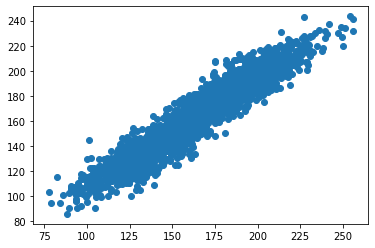

In [34]:
plt.scatter(y_test, lr_pred)

In [35]:
#check error
error = y_test-lr_pred
error

7154    16.970591
3258   -13.017492
2188    -0.372355
5609    17.525167
3186     2.473584
          ...    
8004     3.422351
7644    -4.449724
8521    -7.271372
957    -16.518405
233     -6.030037
Name: Weight, Length: 2567, dtype: float64

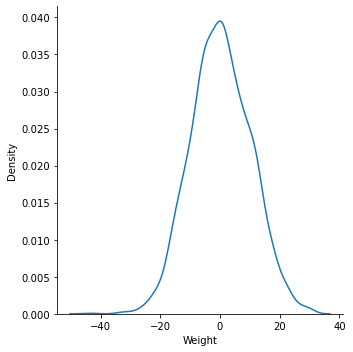

In [36]:
sns.displot(error, kind='kde')

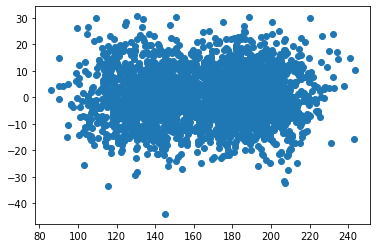

In [37]:
plt.scatter(lr_pred, error)

# Evaluate the Model

In [38]:
#Checking Accuracy 
reg.score(X_test, y_test)

0.905995960709116

In [39]:
#Checking MSE
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, lr_pred))

99.67250998070034


In [40]:
#Checking MAE
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, lr_pred))

7.98213259272913


# Model Training with KNN Regressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
knn = KNeighborsRegressor(111)

In [43]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=111)

In [44]:
knn_pred = knn.predict(X_test)

In [45]:
knn_pred

array([143.43508166, 197.96577977, 185.11534882, ..., 160.33540686,
       186.1666524 , 201.51998499])

# Evaluate the Model

In [46]:
#Checking Accuracy 
knn.score(X_test, y_test)

0.9013901029425118

In [47]:
#Checking MSE
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, knn_pred))

104.55610229944097


In [48]:
#Checking MAE
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, knn_pred))

8.143736591121652


# Checking The Models and Prediction

In [49]:
#Actual Data
y_test

7154    160.800726
3258    184.516688
2188    184.262796
5609    166.844114
3186    200.466282
           ...    
8004    110.815421
7644    148.605255
8521    153.436481
957     170.310122
233     195.392618
Name: Weight, Length: 2567, dtype: float64

In [50]:
#Predicted data using Linear Regression
print(lr_pred)

[143.83013436 197.53417989 184.63515112 ... 160.7078525  186.82852694
 201.4226542 ]


In [51]:
#Predicted data using KNN Regressor
print(knn_pred)

[143.43508166 197.96577977 185.11534882 ... 160.33540686 186.1666524
 201.51998499]


# KNN Classification

In [52]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [53]:
#Encode the categorical feature
df1.Gender = le.fit_transform(df1['Gender'])

In [54]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [60]:
X = df1.drop(['Gender'], axis=1)
y = df1['Gender']

In [61]:
X.shape

(8555, 2)

In [62]:
y.shape

(8555,)

In [63]:
#Train & Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=1)

In [64]:
X_train.shape

(5988, 2)

In [66]:
X_test.shape

(2567, 2)

In [68]:
#Import Algorithm and Fit the model
from sklearn.neighbors import KNeighborsClassifier
knb = KNeighborsClassifier(n_neighbors=111)

knb.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=111)

In [70]:
knc_pred = knb.predict(X_test)
knc_pred

array([1, 1, 1, ..., 0, 1, 1])

# Evaluate The Model

In [72]:
from sklearn.metrics import   classification_report,accuracy_score,confusion_matrix, roc_curve, plot_roc_curve
print(classification_report(y_test, knc_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1055
           1       0.93      0.93      0.93      1512

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



In [73]:
#Checking Accuracy 
knb.score(X_test, y_test)

0.9185820023373588

In [76]:
print('MSE: ',mean_squared_error(y_test, knc_pred))
print('MAE: ',mean_absolute_error(y_test, knc_pred))

MSE:  0.08141799766264121
MAE:  0.08141799766264121
